In [1]:
# In a new Jupyter Notebook cell
import numpy as np
import matplotlib.pyplot as plt
from src.landscape import *
# ===================================================================
# PHASE 1: THE ENGINE (`landscape.py` logic, now inside the notebook)
# # ===================================================================

# class LossSurface:
#     """
#     A class to analyze and visualize 2D loss surfaces.
#     It computes geometry numerically from first principles.
#     """
#     def __init__(self, func):
#         self.func = func

#     def compute_gradient_at(self, point: np.ndarray, h=1e-6):
#         """ Computes the gradient vector using the central finite difference method. """
#         x, y = point
#         df_dx = (self.func(x + h, y) - self.func(x - h, y)) / (2 * h)
#         df_dy = (self.func(x, y + h) - self.func(x, y - h)) / (2 * h)
#         return np.array([df_dx, df_dy])

#     def compute_hessian_at(self, point: np.ndarray, h=1e-6):
#         """ Computes the 2x2 Hessian matrix using central finite differences. """
#         x, y = point
#         f_xx = (self.func(x + h, y) - 2 * self.func(x, y) + self.func(x - h, y)) / (h**2)
#         f_yy = (self.func(x, y + h) - 2 * self.func(x, y) + self.func(x, y - h)) / (h**2)
#         f_xy = (self.func(x + h, y + h) - self.func(x + h, y - h) - self.func(x - h, y + h) + self.func(x - h, y - h)) / (4 * h**2)
#         return np.array([[f_xx, f_xy], [f_xy, f_yy]])

#     def analyze_curvature_at(self, point: np.ndarray):
#         """ Analyzes the local geometry at a point using the Hessian's eigendecomposition. """
#         hessian = self.compute_hessian_at(point)
#         eigenvalues, eigenvectors = np.linalg.eig(hessian)
        
#         order = np.argsort(np.abs(eigenvalues))[::-1]
#         eigenvalues = eigenvalues[order]
#         eigenvectors = eigenvectors[:, order]

#         condition_number = np.abs(eigenvalues[0]) / (np.abs(eigenvalues[1]) + 1e-8)

#         point_type = "Undetermined"
#         if np.all(eigenvalues > 0.1): point_type = "Steep Valley"
#         elif np.all(eigenvalues > 0): point_type = "Flat Basin (Minimum)"
#         elif np.all(eigenvalues < 0): point_type = "Ridge (Maximum)"
#         elif eigenvalues[0] * eigenvalues[1] < 0: point_type = "Saddle Point"

#         return {
#             "eigenvalues": eigenvalues,
#             "eigenvectors": eigenvectors,
#             "condition_number": condition_number,
#             "point_type": point_type
#         }

#     def run_optimizer(self, start_point: np.ndarray, optimizer_type='sgd', 
#                         lr=0.001, momentum=0.9, num_steps=5000):
#         """ Simulates the path of an optimizer on the surface. """
#         path = [start_point]
#         position = np.copy(start_point)
#         velocity = np.zeros_like(position)

#         for _ in range(num_steps):
#             grad = self.compute_gradient_at(position)
            
#             if optimizer_type == 'sgd':
#                 position = position - lr * grad
#             elif optimizer_type == 'momentum':
#                 velocity = momentum * velocity - lr * grad
#                 position = position + velocity
#             else:
#                 raise ValueError("Unsupported optimizer type")
                
#             path.append(np.copy(position))
            
#             if np.linalg.norm(position) > 1e3 or np.linalg.norm(path[-1] - path[-2]) < 1e-9:
#                 break
        
#         return np.array(path)

print("Project Vitruvius Engine: `LossSurface` class defined successfully.")

Project Vitruvius Engine: `LossSurface` class defined successfully.


Generating the contour plot of the Rosenbrock function...


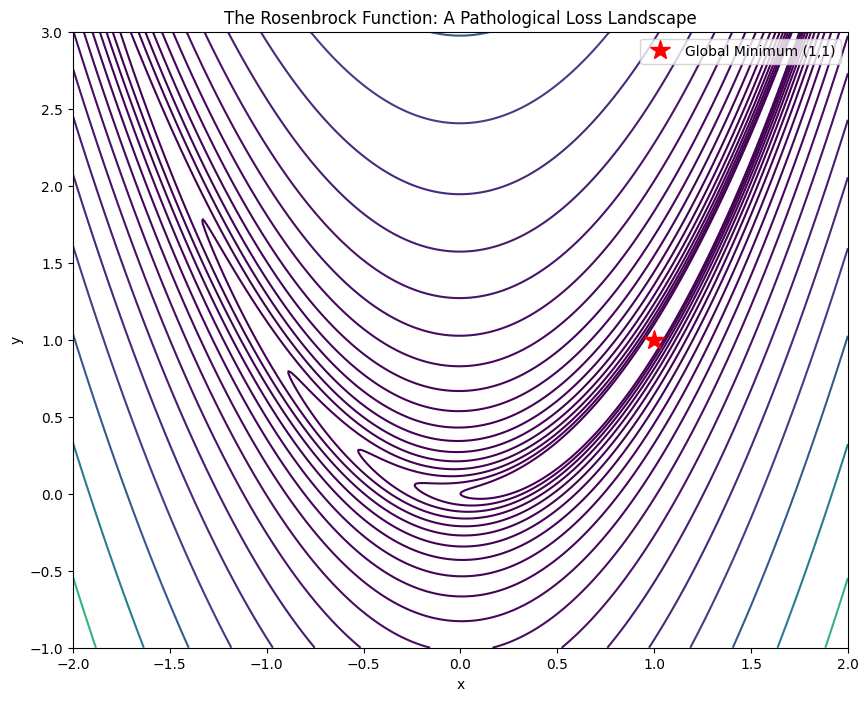

In [2]:
# --- 1. The Laboratory: The Rosenbrock Function ---
# This is a classic, notoriously difficult non-convex function to optimize.
# The global minimum is at (1, 1).

def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

rosenbrock_surface = LossSurface(rosenbrock)

# --- 2. The Arena: Visualizing the Landscape ---
print("Generating the contour plot of the Rosenbrock function...")
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, 3.5, 20), cmap='viridis')
plt.plot(1, 1, 'r*', markersize=15, label="Global Minimum (1,1)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("The Rosenbrock Function: A Pathological Loss Landscape")
plt.legend()
plt.show()

In [3]:

point_wall = np.array([-1.5, 2.0])
point_floor = np.array([0.0, 0.0])

analysis_wall = rosenbrock_surface.analyze_curvature_at(point_wall)
analysis_floor = rosenbrock_surface.analyze_curvature_at(point_floor)

print("--- Analysis of the Steep Valley Wall at {} ---".format(point_wall))
print(f"Point Type: {analysis_wall['point_type']}")
print(f"Eigenvalues (Curvature Magnitudes): {analysis_wall['eigenvalues']}")
print(f"Condition Number (Curvature Anisotropy): {analysis_wall['condition_number']:.2f}")

print("\n--- Analysis of the Valley Floor at {} ---".format(point_floor))
print(f"Point Type: {analysis_floor['point_type']}")
print(f"Eigenvalues (Curvature Magnitudes): {analysis_floor['eigenvalues']}")
print(f"Condition Number (Curvature Anisotropy): {analysis_floor['condition_number']:.2f}")


--- Analysis of the Steep Valley Wall at [-1.5  2. ] ---
Point Type: Steep Valley
Eigenvalues (Curvature Magnitudes): [2092.2377922     9.73946672]
Condition Number (Curvature Anisotropy): 214.82

--- Analysis of the Valley Floor at [0. 0.] ---
Point Type: Steep Valley
Eigenvalues (Curvature Magnitudes): [200.00001655   1.99973371]
Condition Number (Curvature Anisotropy): 100.01


In [6]:

'''**Analysis:** The results are stark. On the valley wall, the condition number is massive, with one eigenvalue being orders of magnitude larger than the other. This numerically confirms our visual intuition: the landscape is extremely steep in one direction (across the valley) and relatively flat in another (along the valley). Even on the floor, the anisotropy is significant. This pathological curvature is the core challenge for any first-order optimizer.
'''

'**Analysis:** The results are stark. On the valley wall, the condition number is massive, with one eigenvalue being orders of magnitude larger than the other. This numerically confirms our visual intuition: the landscape is extremely steep in one direction (across the valley) and relatively flat in another (along the valley). Even on the floor, the anisotropy is significant. This pathological curvature is the core challenge for any first-order optimizer.\n'

In [7]:
'''We will now simulate a standard SGD optimizer and visualize its path. The gradient, by definition, points in the direction of steepest descent, which we know is across the valley, not along it.
'''

'We will now simulate a standard SGD optimizer and visualize its path. The gradient, by definition, points in the direction of steepest descent, which we know is across the valley, not along it.\n'

Running SGD simulation...
SGD finished in 1001 steps.


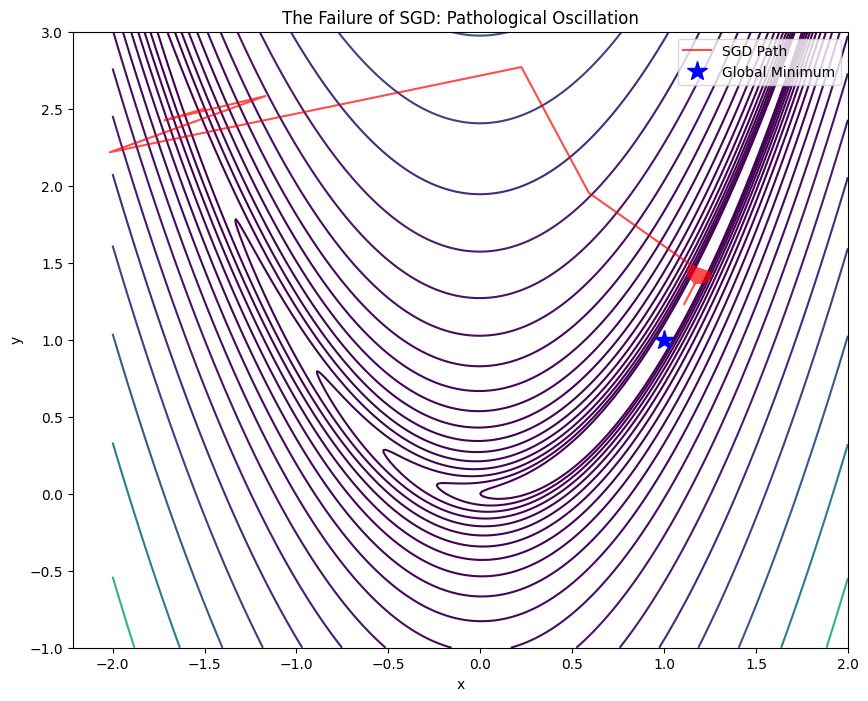

In [9]:




start_point = np.array([-1.5, 2.5])

print("Running SGD simulation...")
path_sgd = rosenbrock_surface.run_optimizer(start_point, optimizer_type='sgd', lr=0.0015, num_steps=1000)
print(f"SGD finished in {len(path_sgd)} steps.")

# Plot the path
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, 3.5, 20), cmap='viridis')
plt.plot(path_sgd[:, 0], path_sgd[:, 1], 'r-', label='SGD Path', alpha=0.7)
plt.plot(1, 1, 'b*', markersize=15, label="Global Minimum")
plt.title("The Failure of SGD: Pathological Oscillation")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()

Running Momentum simulation...
Momentum finished in 1001 steps.


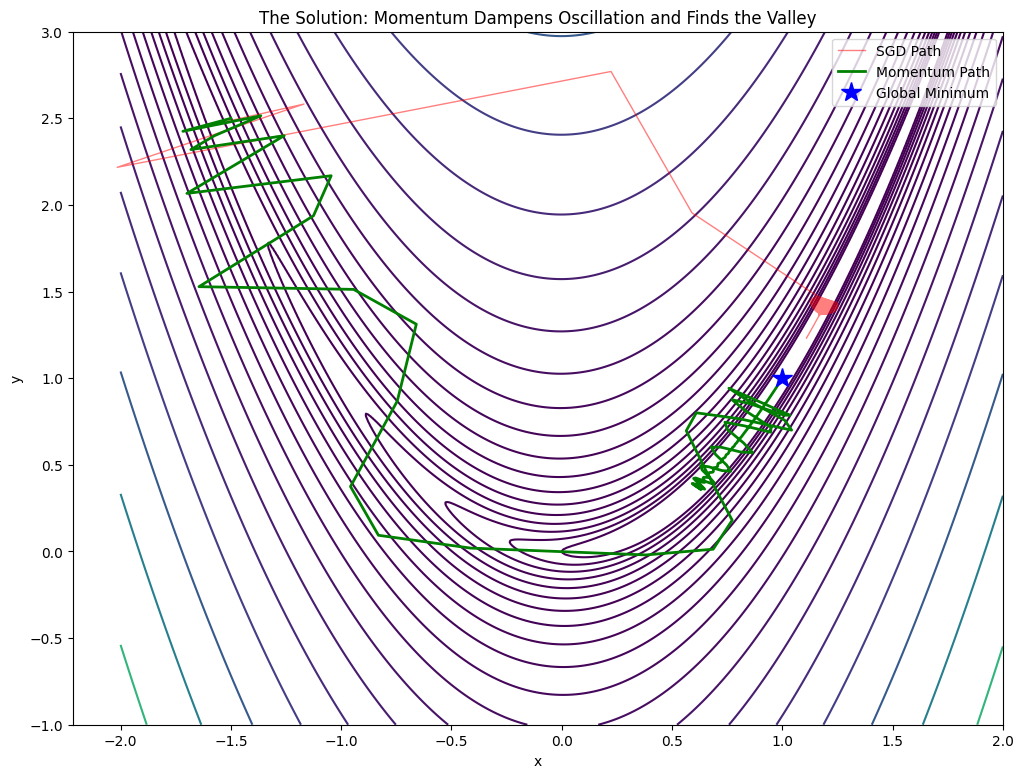

In [10]:

print("Running Momentum simulation...")
path_momentum = rosenbrock_surface.run_optimizer(start_point, optimizer_type='momentum', lr=0.0015, momentum=0.9, num_steps=1000)
print(f"Momentum finished in {len(path_momentum)} steps.")

# Plot both paths for comparison
plt.figure(figsize=(12, 9))
plt.contour(X, Y, Z, levels=np.logspace(0, 3.5, 20), cmap='viridis')
plt.plot(path_sgd[:, 0], path_sgd[:, 1], 'r-', label='SGD Path', alpha=0.5, linewidth=1)
plt.plot(path_momentum[:, 0], path_momentum[:, 1], 'g-', label='Momentum Path', linewidth=2)
plt.plot(1, 1, 'b*', markersize=15, label="Global Minimum")
plt.title("The Solution: Momentum Dampens Oscillation and Finds the Valley")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()